Chloe Quinto    
CPE 695/WS  
HW2   
February 12, 2020   
I pledge my honor that I have abided by the Stevens Honor System - Chloe Quinto 


---

Some notes for myself: 

Since the Cost Function J(Ɵ) calculates errors of our model, 
so we tend to decrease it to the minimum value possible because the lowest the error, 
the more robust and efficient is our model.

---

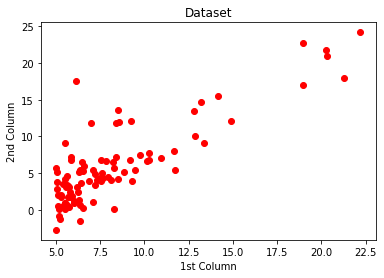

In [1]:
"""
In this problem, we write a program to find the coefficients for a linear regression model for the dataset
provided by (data2.txt). Assume a linear model: y = w0 + w1* x
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv("data2.txt", header = None)

x = np.array(data[0])
y = np.array(data[1])

plt.scatter(x,y,color='red')
plt.title("Dataset")
plt.xlabel("1st Column")
plt.ylabel("2nd Column")
plt.show()


---

We need to find the normal equation given: 

<img src="images/normalEquation.png">


In [2]:
#add an additional column of 1s in our x column and we call this additional matrix as x_bias.
x_bias = np.ones((97,1))
x = np.reshape(x,(97,1))
x = np.append(x_bias,x,axis=1)

Let's try to find our transpose, dotproduct, and inverse

<img src="images/firstHalf.png">

In [3]:
x_transpose = np.transpose(x) #x^T
x_transpose_dot_x = x_transpose.dot(x) #x^T*x
firstHalf = np.linalg.inv(x_transpose_dot_x)# (x^T*x)^-1

In [4]:
firstHalf

array([[ 0.05662112, -0.00567561],
       [-0.00567561,  0.00069556]])

Now we have to take find the transpose and dot product of the second half of the equation

<img src = "images/secondHalf.png">

In [5]:
secondHalf = x_transpose.dot(y) #x^T*y 

In [6]:
secondHalf

array([ 566.3961    , 6336.89842532])

In [7]:
theta = firstHalf.dot(secondHalf)

In [8]:
thetaOne = theta[0]
thetaTwo = theta[1]

print("y=" + str(thetaOne) + " + "+ str(thetaTwo) + "*x")
y = thetaOne + thetaTwo*x

y=-3.8957808783119106 + 1.1930336441895983*x


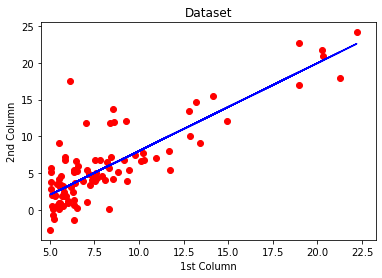

In [9]:
x_original = np.array(data[0])
y_original = np.array(data[1])


plt.scatter(x_original, y_original, color="red")
plt.plot(x,y,color='blue') 
plt.xlim(4.5)
plt.title("Dataset")
plt.xlabel("1st Column")
plt.ylabel("2nd Column")
plt.show()

---

Gradient Descent using batch AND stochastic modes respectively: 
 - Determine an appropriate termination condition(e.g. when cost function
    is less than a threshold, and/or after a given number of iterations)
 - Print the cost function vs iterations for each mode; compare and disuss batch and stochastic modes in terms of accuracy and the speed of convergence 
 - Choose the best learning rate. For example, you can plot cost function bs. learning rate to determine the best learning ratee 

What is gradient descent? 
- The goal of the gradient descent is to minimise a given function which, in our case, is the loss function of the neural network.
- In Batch Gradient Descent, all the training data is taken into consideration to take a single step.


Batch Gradient Descent
- Using all data sets to claculate the gradient and update w

Stochastic Gradient Descent 
- Using one RANDOM sample to calculate the gradient and update w 

In [10]:
x = np.array(data[0])
y = np.array(data[1])
x = np.reshape(x,(97,1))
y = np.reshape(y,(97,1))


x_bias = np.c_[np.ones((97, 1)), x] # add x0 = 1 to each instance

theta_best = np.linalg.inv(x_bias.T.dot(x_bias)).dot(x_bias.T).dot(y)

print("Normal Equation: (" + str(int(theta_best[0])) + "," + str(int(theta_best[1])) + ")")

eta = .01 # learning rate
n_iterations = 100
m = 97

theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * x_bias.T.dot(x_bias.dot(theta) - y)
    theta = theta - eta * gradients
print("Gradient Descent: (" + str(int(theta[0])) + "," + str(int(theta[1])) + ")")


Normal Equation: (-3,1)
Gradient Descent: (0,0)


In [14]:
learning_rate = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5,1,2,5]
theta_values = []
theta = np.random.randn(2,1) # random initialization
for i in range(len(learning_rate)): 
    for iteration in range(n_iterations):
        gradients = 2/m * x_bias.T.dot(x_bias.dot(theta) - y)
        theta = theta - eta * gradients
    a = int(theta[0])
    b = int(theta[1])
    theta_values.append([a,b])
    print("Learning Rate: " + str(learning_rate[i]) + " cost: " + str([a,b]))

Learning Rate: 0.01 cost: [0, 0]
Learning Rate: 0.02 cost: [-1, 0]
Learning Rate: 0.05 cost: [-2, 1]
Learning Rate: 0.1 cost: [-2, 1]
Learning Rate: 0.2 cost: [-2, 1]
Learning Rate: 0.5 cost: [-3, 1]
Learning Rate: 1 cost: [-3, 1]
Learning Rate: 2 cost: [-3, 1]
Learning Rate: 5 cost: [-3, 1]


Determine the appropriate termination condition (e.g. when cost function is less than the threshold and/or after a given number of iterations 
                                                )

In [13]:

val

[-3, 1]